# Data Analysis of the Forest Covertypes data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 60)
%matplotlib inline


In [11]:
# Load data
train = pd.read_csv("data/raw/train.csv")
test = pd.read_csv("data/raw/test.csv")

### Looking at Data:

In [7]:
# quick look at the train data
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [17]:
# quick look at the test data
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Data Types:**

In [15]:
# check data types in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [16]:
# check data types in the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  565892 non-null  int64
 1   Elevation                           565892 non-null  int64
 2   Aspect                              565892 non-null  int64
 3   Slope                               565892 non-null  int64
 4   Horizontal_Distance_To_Hydrology    565892 non-null  int64
 5   Vertical_Distance_To_Hydrology      565892 non-null  int64
 6   Horizontal_Distance_To_Roadways     565892 non-null  int64
 7   Hillshade_9am                       565892 non-null  int64
 8   Hillshade_Noon                      565892 non-null  int64
 9   Hillshade_3pm                       565892 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  565892 non-null  int64
 11  Wilderness_Area1                    565892 non-null 

**Missing values:**

In [18]:
# checking the number of null values in the train dataset
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [19]:
# checking the number of null values in the test dataset
test.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


There is no missing values in the train and test sets.

**Unique values of Each Feature:**

In [21]:
# checking the number of unique values in the train dataset
train.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [22]:
# checking the number of unique values in the test dataset
test.nunique()

Id                                    565892
Elevation                               1974
Aspect                                   361
Slope                                     67
Horizontal_Distance_To_Hydrology         551
Vertical_Distance_To_Hydrology           700
Horizontal_Distance_To_Roadways         5785
Hillshade_9am                            207
Hillshade_Noon                           185
Hillshade_3pm                            255
Horizontal_Distance_To_Fire_Points      5826
Wilderness_Area1                           2
Wilderness_Area2                           2
Wilderness_Area3                           2
Wilderness_Area4                           2
Soil_Type1                                 2
Soil_Type2                                 2
Soil_Type3                                 2
Soil_Type4                                 2
Soil_Type5                                 2
Soil_Type6                                 2
Soil_Type7                                 2
Soil_Type8

In [49]:
# checking if Wilderness_Area is one hot encoded
pd.DataFrame(train['Wilderness_Area1'] + train['Wilderness_Area2'] + train['Wilderness_Area3'] + train['Wilderness_Area4']).nunique()

0    1
dtype: int64

In [50]:
# checking if Soil_Type is one hot encoded
pd.DataFrame(train['Soil_Type1'] + train['Soil_Type2'] + train['Soil_Type3'] + train['Soil_Type4'] + train['Soil_Type5'] + train['Soil_Type6'] + train['Soil_Type7'] + train['Soil_Type8'] + train['Soil_Type9'] + train['Soil_Type10'] + train['Soil_Type11'] + train['Soil_Type12'] + train['Soil_Type13'] + train['Soil_Type14'] + train['Soil_Type15'] + train['Soil_Type16'] + train['Soil_Type17'] + train['Soil_Type18'] + train['Soil_Type19'] + train['Soil_Type20'] + train['Soil_Type21'] + train['Soil_Type22'] + train['Soil_Type23'] + train['Soil_Type24'] + train['Soil_Type25'] + train['Soil_Type26'] + train['Soil_Type27'] + train['Soil_Type28'] + train['Soil_Type29'] + train['Soil_Type30'] + train['Soil_Type31'] + train['Soil_Type32'] + train['Soil_Type33'] + train['Soil_Type34'] + train['Soil_Type35'] + train['Soil_Type36'] + train['Soil_Type37'] + train['Soil_Type38'] + train['Soil_Type39'] + train['Soil_Type40']).nunique()

0    1
dtype: int64

**Some Statistics:**

In [25]:
# Checking some statistics of the train dataset
train.describe().round(2)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.0,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.0,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.0
mean,7560.50,2749.32,156.68,16.50,227.20,51.08,1714.02,212.70,218.97,135.09,1511.15,0.24,0.03,0.42,0.31,0.02,0.04,0.06,0.06,0.01,0.04,0.0,0.00,0.00,0.14,0.03,0.02,0.03,0.01,0.0,0.01,0.04,0.00,0.00,0.01,0.00,0.02,0.05,0.02,0.00,0.00,0.00,0.00,0.09,0.05,0.02,0.05,0.04,0.00,0.01,0.00,0.00,0.05,0.04,0.03,4.0
std,4364.91,417.68,110.09,8.45,210.08,61.24,1325.07,30.56,22.80,45.90,1099.94,0.43,0.18,0.49,0.46,0.15,0.20,0.24,0.23,0.10,0.20,0.0,0.01,0.03,0.35,0.16,0.12,0.17,0.11,0.0,0.09,0.20,0.06,0.06,0.10,0.03,0.15,0.22,0.13,0.01,0.06,0.03,0.02,0.28,0.21,0.15,0.21,0.20,0.04,0.08,0.03,0.05,0.21,0.20,0.17,2.0
min,1.00,1863.00,0.00,0.00,0.00,-146.00,0.00,0.00,99.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
25%,3780.75,2376.00,65.00,10.00,67.00,5.00,764.00,196.00,207.00,106.00,730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0
50%,7560.50,2752.00,126.00,15.00,180.00,32.00,1316.00,220.00,223.00,138.00,1256.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.0
75%,11340.25,3104.00,261.00,22.00,330.00,79.00,2270.00,235.00,235.00,167.00,1988.25,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.0
max,15120.00,3849.00,360.00,52.00,1343.00,554.00,6890.00,254.00,254.00,248.00,6993.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.0


In [26]:
# Checking some statistics of the test dataset
test.describe().round(2)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.0,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.0,565892.00,565892.00,565892.00,565892.00,565892.00,565892.0,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00,565892.00
mean,298066.50,2964.98,155.63,14.04,270.56,46.29,2367.14,212.13,223.44,142.73,1992.83,0.45,0.05,0.44,0.06,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.00,0.00,0.05,0.02,0.05,0.03,0.00,0.0,0.00,0.00,0.00,0.01,0.02,0.00,0.06,0.1,0.04,0.00,0.00,0.00,0.00,0.2,0.05,0.04,0.09,0.08,0.00,0.00,0.00,0.00,0.03,0.02,0.01
std,163359.09,273.16,111.96,7.45,212.50,58.21,1561.48,26.66,19.67,38.03,1327.40,0.50,0.22,0.50,0.23,0.07,0.11,0.08,0.14,0.05,0.10,0.01,0.02,0.04,0.23,0.14,0.22,0.17,0.03,0.0,0.07,0.07,0.06,0.08,0.13,0.04,0.23,0.3,0.19,0.03,0.07,0.04,0.04,0.4,0.22,0.21,0.29,0.27,0.05,0.06,0.01,0.02,0.16,0.15,0.12
min,15121.00,1859.00,0.00,0.00,0.00,-173.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156593.75,2818.00,58.00,9.00,108.00,7.00,1116.00,198.00,213.00,119.00,1034.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,298066.50,2999.00,127.00,13.00,228.00,29.00,2018.00,218.00,226.00,143.00,1723.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,439539.25,3164.00,260.00,18.00,390.00,69.00,3349.00,231.00,237.00,168.00,2561.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,581012.00,3858.00,360.00,66.00,1397.00,601.00,7117.00,254.00,254.00,254.00,7173.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**Anamoly Detection:**

<AxesSubplot:>

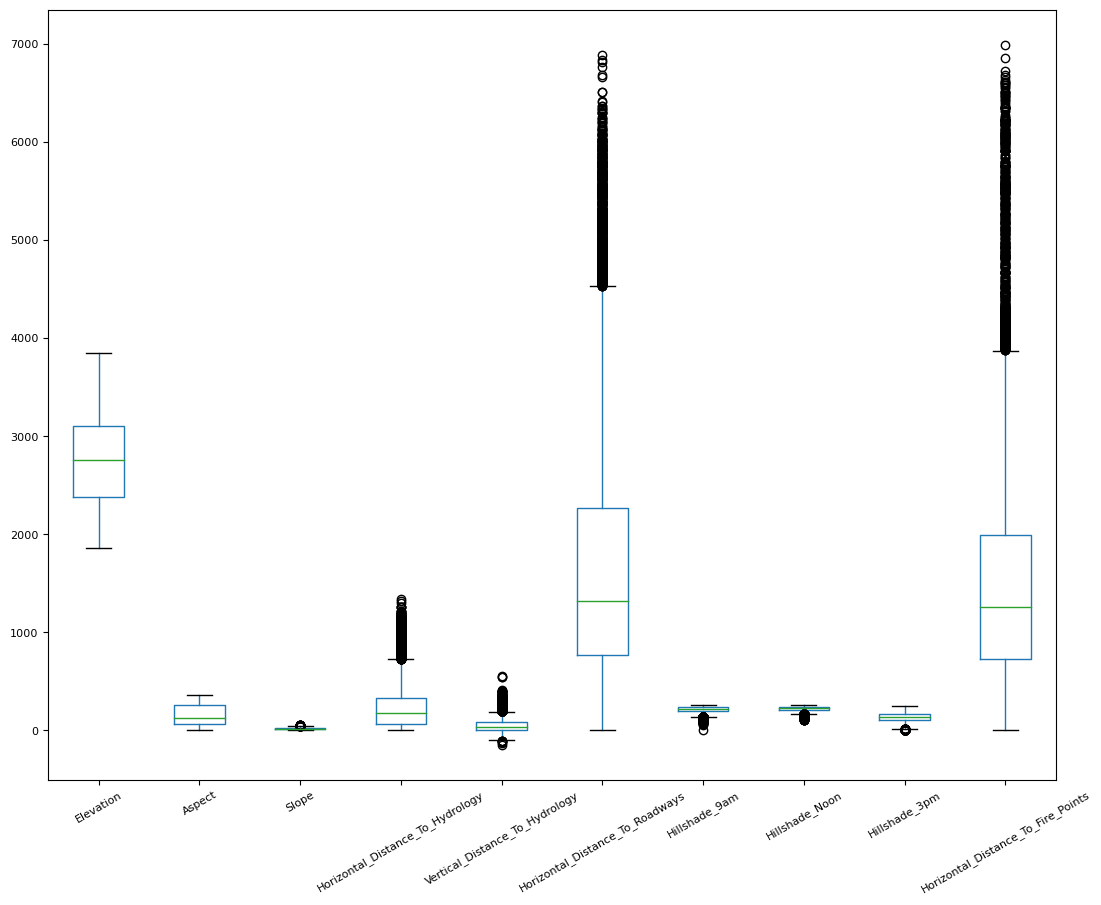

In [33]:
# checking for outliers using box plots in the train dataset (for non-binary columns)
cols = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
train[cols].boxplot(figsize=(13, 10), grid=False, rot=30, fontsize=8)

Defining a function for detecting the outliers based on the Box-Jenkins definition: 

In [40]:
def outlier_detection(df, col_name):

    quartile1 = np.percentile(np.array(df[col_name].tolist()), 25) # 25th percentile
    quartile3 = np.percentile(np.array(df[col_name].tolist()), 75) # 75th percentile
    IQR = quartile3 - quartile1 # Interquartile range
                      
    limit_upper = quartile3 + (3 * IQR)
    limit_lower = quartile1 - (3 * IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < limit_lower) | (value > limit_upper):
            outlier_count += 1
    return outlier_count, limit_upper, limit_lower

In [41]:
# checking for outliers in the train dataset (for non-binary columns)
for col in cols:
    print("Outlier count for column {} is {}".format(col, outlier_detection(train, col)[0]))

Outlier count for column Elevation is 0
Outlier count for column Aspect is 0
Outlier count for column Slope is 0
Outlier count for column Horizontal_Distance_To_Hydrology is 53
Outlier count for column Vertical_Distance_To_Hydrology is 49
Outlier count for column Horizontal_Distance_To_Roadways is 3
Outlier count for column Hillshade_9am is 7
Outlier count for column Hillshade_Noon is 20
Outlier count for column Hillshade_3pm is 0
Outlier count for column Horizontal_Distance_To_Fire_Points is 132


Removing data points with outliers considering the outlier detection based on the column with the highest number of outliers:

In [74]:
# removing outliers from the train dataset (only considering Horizontal_Distance_To_Fire_Points column)
cols = ['Horizontal_Distance_To_Fire_Points']
for col in cols:
    train_mod1 = train[(train[col] <= outlier_detection(train, col)[1]) & (train[col] >= outlier_detection(train, col)[2])]

train_mod1.reset_index(drop=True, inplace=True)
train_mod1.shape

(14988, 56)

train_mod1 is the new train dataset.

**Distribution of Target:**

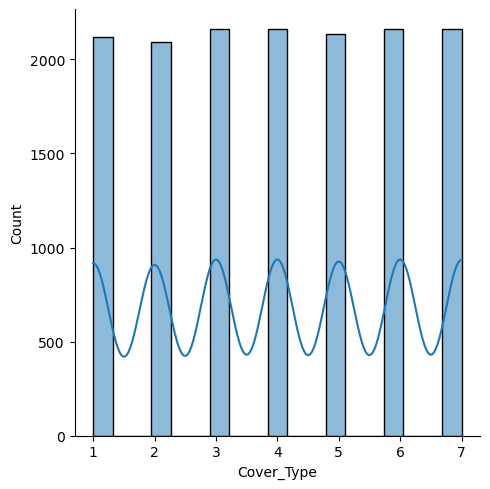

In [100]:
# distribution of the target variable
sns.displot(data=train_mod1, x="Cover_Type", kde=True)


In [76]:
# checking the number of each label in the train dataset for target variable
train_mod1['Cover_Type'].value_counts()

7    2160
3    2160
6    2160
4    2160
5    2135
1    2119
2    2094
Name: Cover_Type, dtype: int64

**Checking Distribution of Target for Each Wilderness_Area:**

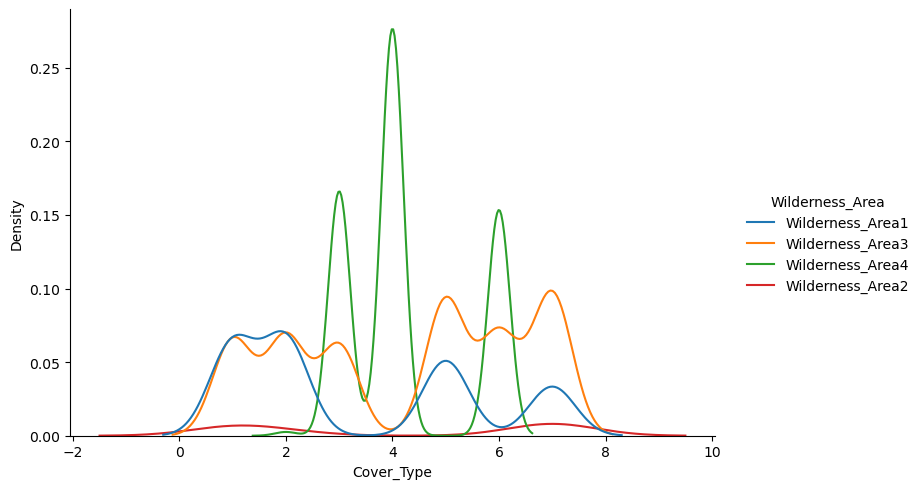

In [98]:
train_mod1['Wilderness_Area'] = (train_mod1.iloc[:, 11:15] == 1).idxmax(1).values
sns.displot(data=train_mod1, x="Cover_Type", hue="Wilderness_Area", kind="kde", height=5, aspect=1.5)

train_mod1.drop(['Wilderness_Area'], axis=1, inplace=True)

It shows that Wilderness_Area can be an important predictor.